## Observations and Insights 

In [156]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
m_data = pd.read_csv(mouse_metadata_path)
s_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged=pd.merge(m_data,s_results, how='left', on='Mouse ID')

# Display the data table for preview
merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [21]:
# Checking the number of mice.
merged['Mouse ID'].value_counts()

g989    13
y865    10
z581    10
p189    10
j119    10
        ..
x336     1
n482     1
d133     1
o848     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [54]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dup_mouse_id = merged.loc[merged.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
#dup=pd.DataFrame.drop_duplicates(subset=['Mouse ID']['Timepoint'])

# merged.drop_duplicates(subset='Mouse ID',keep='first')
# merged['Mouse ID'].count()


In [55]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned=merged.drop_duplicates(subset='Mouse ID', keep='last')
cleaned['Mouse ID'].count()
cleaned

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


## Summary Statistics

In [56]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
cleaned_mean=np.mean(cleaned['Tumor Volume (mm3)'])
cleaned_med=cleaned['Tumor Volume (mm3)'].median()
cleaned_var=np.var(cleaned['Tumor Volume (mm3)'], ddof=0)
cleaned_std=np.std(cleaned['Tumor Volume (mm3)'], ddof=0)
cleaned_SEM=st.sem(cleaned['Tumor Volume (mm3)'])
# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary={'Tumor Volume Mean':cleaned_mean,
           'Tumor Volume Median':cleaned_med,
           'Tumor Volume Variance':cleaned_var,
           'Tumor Volume Standard Deviation':cleaned_std,
         'Tumor Volume SEM':cleaned_SEM
        }
summary


{'Tumor Volume Mean': 54.99913687738955,
 'Tumor Volume Median': 55.84141007,
 'Tumor Volume Variance': 159.50787704180308,
 'Tumor Volume Standard Deviation': 12.62964279153623,
 'Tumor Volume SEM': 0.801983119246071}

In [67]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

grouped= cleaned.groupby('Drug Regimen')
regimen = grouped.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
regimen



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


## Bar and Pie Charts

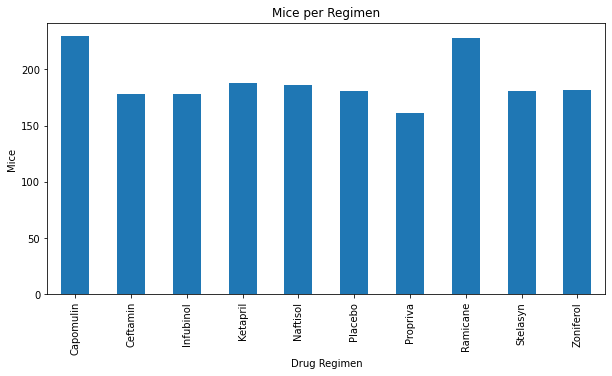

In [89]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
regimen_data = merged.groupby(["Drug Regimen"]).count()["Mouse ID"]
regimen_data.plot(kind="bar", figsize=(10,5))

#set chart title
plt.title("Mice per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice")
plt.show()


<BarContainer object of 10 artists>

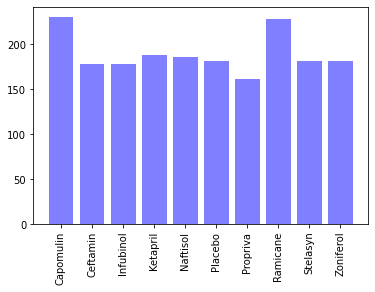

In [90]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

regimens=["Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol','Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol"]
mice_count = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]


x_axis = np.arange(len(regimen_data))

tick_locations = [x for x in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 
                            'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn',
                            'Zoniferol'],  rotation='vertical')
plt.bar(x_axis, users, color='b', alpha=0.5, align='center')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000027885C0D0A0>],
      dtype=object)

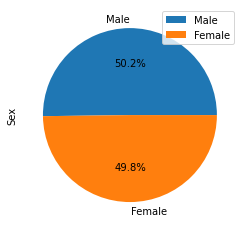

In [100]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender=pd.DataFrame(cleaned['Sex'].value_counts())
gender.plot(kind='pie', subplots=True, autopct="%1.1f%%",)


([<matplotlib.patches.Wedge at 0x27885cb7d00>,
 [Text(-0.0069391759767656585, 1.0999781124353174, 'Male'),
  Text(0.006939175976765524, -1.0999781124353174, 'Female')],
 [Text(-0.0037850050782358134, 0.5999880613283548, '50.2%'),
  Text(0.00378500507823574, -0.5999880613283548, '49.8%')])

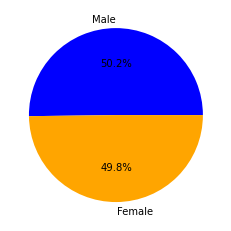

In [103]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels=['Male','Female']
sizes=[125,124]
colors=['blue','orange']
plt.pie(sizes, labels=labels,colors=colors,autopct="%1.1f%%")

## Quartiles, Outliers and Boxplots

In [109]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
best_regimes = cleaned[cleaned["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
best_regimes

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3


The lower quartile of tumor volume is: 45.93471217
The upper quartile of tumor volume is: 64.95756185
The interquartile range of tumor volume is: 19.022849680000007
The the median of tumor volume is: 55.84141007 
Values below 17.400437649999986 could be outliers.
Values above 93.49183637000002 could be outliers.


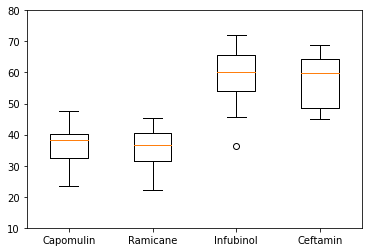

In [118]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vols =cleaned['Tumor Volume (mm3)']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = tumor_vols.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest    

final_df = best_regimes.reset_index()
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(treatments)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=treatments)
plt.ylim(10, 80)
plt.show()  

## Line and Scatter Plots

Text(0, 0.5, 'Volume (mm3)')

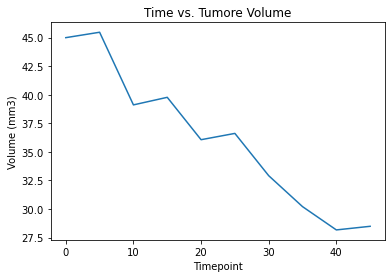

In [148]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_x = merged[merged["Mouse ID"].isin(["x401"])]
mouse_x

timeVtumor=mouse_x[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
#timeVtumor.plot.line()

x_ax=timeVtumor['Timepoint']
y_ax=timeVtumor['Tumor Volume (mm3)']
plt.plot(x_ax, y_ax)

plt.title("Time vs. Tumore Volume")
plt.xlabel("Timepoint")
plt.ylabel("Volume (mm3)")

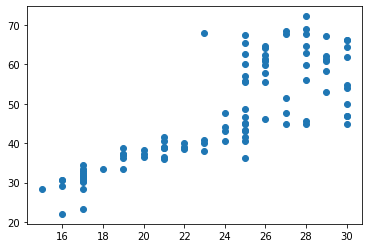

In [145]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin = merged[merged["Drug Regimen"].isin(["Capomulin"])]
capomulin_df = best_regimes[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]
capomulin_df

x=capomulin_df['Weight (g)']
y=capomulin_df['Tumor Volume (mm3)']
plt.scatter(x,y)
plt.title("Time vs. Tumore Volume")
plt.xlabel("Timepoint")
plt.ylabel("Volume (mm3)")

## Correlation and Regression

The correlation between both factors is 0.82


Text(6, 10, 'y = 2.36x + -8.77')

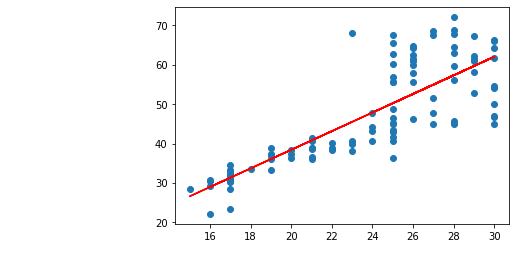

In [159]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr= st.pearsonr(x,y)
print(f"The correlation between both factors is {round(corr[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")